In [1]:
import numpy as np
import os
%load_ext autoreload
%autoreload 2
from PIL import Image 
from IPython.display import clear_output
from matplotlib.pyplot import imshow 
import matplotlib.pyplot as plt
import PIL
import torch
import pandas as pd
%matplotlib inline

### Add path to project 

In [2]:
import sys
sys.path
sys.path.append('/home/vage/PycharmProjects/Deep-Vectorization-of-Technical-Drawings/')

In [3]:
from util_files.rendering.cairo  import render,render_with_skeleton
from util_files.data.graphics_primitives import PT_LINE,  PT_CBEZIER, PT_QBEZIER

In [4]:
# Lets make for example 3 random quadratic bezier and 2 lines from interval (0,1)

In [39]:
curves  = np.random.rand(3,6)
curve_width = np.random.rand(3)*7 # (to make width from 0 to 7 pixel )

lines  = np.random.rand(3,4)
lines_width = np.random.rand(3)*7 # (to make width from 0 to 7 pixel )

In [40]:
# define canvas dimensions

In [41]:
dimensions = 128

In [42]:
# make your coordinates from (0,1) to bounded by canvas size 

In [43]:
curves = curves *dimensions
lines  = lines *dimensions

In [44]:
#concatenate curves parameter and curve with(curve with as last paraqmeter)

In [45]:
np.concatenate((curves, curve_width[...,None]),axis=1).shape

(3, 7)

In [46]:
# Define dictionary with ptimitives (PT_LINE, PT_QBEZIER)

In [47]:
a ={PT_QBEZIER:np.concatenate((curves , curve_width[...,None]),axis=1),PT_LINE:np.concatenate((lines, lines_width[...,None]),axis=1)}

In [48]:
# To render image call render or render_with_skeleton function from util_files.rendering.cairo 


In [49]:
rendered_image = render(a,(dimensions,dimensions), data_representation='vahe',linecaps='round')
#For primitives format (number_priimtives,primitive_params), data_representation should be vahe.
#You could alsoo render if format

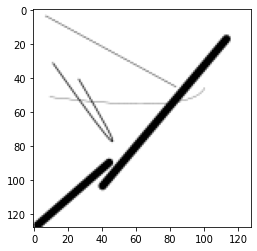

In [50]:
plt.imshow(rendered_image,'gray')

In [56]:
print(curves, curve_width)

[[ 84.19966973 109.76010808  84.22535816 107.38562636  34.35409299
  125.61058672]
 [ 11.71686681  31.76758876  73.44613283 118.99210041  26.86816371
   41.16866951]
 [100.81853379  46.27104913  93.70190275  62.02633533   9.82906129
   51.70005238]] [0.01925638 0.69412293 0.25201525]


In [57]:
print(lines, lines_width)

[[  7.27823925   3.94246331  84.02630513  45.75096918]
 [  2.7607725  126.81282717  44.74563228  90.1399291 ]
 [113.61141461  17.55551693  40.88136935 103.89383666]] [0.38831483 4.7262562  4.81894544]


In [ ]:
# 